# Bibliotecas

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
library(dplyr)

In [ ]:
library(scales)

# Importando base COVID

In [ ]:
base_parte_0 <- read.csv2("DFp1.csv", sep = ";", quote = "")

In [ ]:
base_parte_5 <- read.csv2("DFp5.csv", sep = ";", quote = "")

In [ ]:
# juntando os arquivos
df_baseCovid = rbind(base_parte_0, base_parte_5)
nrow(df_baseCovid)

[1] 2730017

# Separando Colunas

In [ ]:
head(df_baseCovid, 1)

,X.document_id.,X.paciente_id.,X.paciente_idade.,X.paciente_dataNascimento.,X.paciente_enumSexoBiologico.,X.paciente_racaCor_codigo.,X.paciente_racaCor_valor.,X.paciente_endereco_coIbgeMunicipio.,X.paciente_endereco_coPais.,X.paciente_endereco_nmMunicipio.,⋯,X.vacina_categoria_codigo.,X.vacina_categoria_nome.,X.vacina_lote.,X.vacina_fabricante_nome.,X.vacina_fabricante_referencia.,X.vacina_dataAplicacao.,X.vacina_descricao_dose.,X.vacina_codigo.,X.vacina_nome.,X.sistema_origem.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"""a4ddfbd0-cb07-4536-a2c9-73d80aef7f4b-i0b0""","""389fd0bf7c26a3a7667c1c89b91a41a08ab70fcfae0c150915659b95afd2205d""","""22""","""1999-05-07""","""M""","""03""","""PARDA""","""530010""","""10""","""BRASILIA""",⋯,"""15""","""População Privada de Liberdade""","""204H21A""","""JANSSEN""","""30587""","""2022-01-11""","""Reforço""","""88""","""COVID-19 JANSSEN - Ad26.COV2.S""","""Novo PNI"""


In [ ]:
colnames(df_baseCovid)

[1] "X.document_id."                             
 [2] "X.paciente_id."                             
 [3] "X.paciente_idade."                          
 [4] "X.paciente_dataNascimento."                 
 [5] "X.paciente_enumSexoBiologico."              
 [6] "X.paciente_racaCor_codigo."                 
 [7] "X.paciente_racaCor_valor."                  
 [8] "X.paciente_endereco_coIbgeMunicipio."       
 [9] "X.paciente_endereco_coPais."                
[10] "X.paciente_endereco_nmMunicipio."           
[11] "X.paciente_endereco_nmPais."                
[12] "X.paciente_endereco_uf."                    
[13] "X.paciente_endereco_cep."                   
[14] "X.paciente_nacionalidade_enumNacionalidade."
[15] "X.estabelecimento_valor."                   
[16] "X.estabelecimento_razaoSocial."             
[17] "X.estalecimento_noFantasia."                
[18] "X.estabelecimento_municipio_codigo."        
[19] "X.estabelecimento_municipio_nome."          
[20] "X.estabelecimento_uf."                      
[21] "X.vacina_grupoAtendimento_codigo."          
[22] "X.vacina_grupoAtendimento_nome."            
[23] "X.vacina_categoria_codigo."                 
[24] "X.vacina_categoria_nome."                   
[25] "X.vacina_lote."                             
[26] "X.vacina_fabricante_nome."                  
[27] "X.vacina_fabricante_referencia."            
[28] "X.vacina_dataAplicacao."                    
[29] "X.vacina_descricao_dose."                   
[30] "X.vacina_codigo."                           
[31] "X.vacina_nome."                             
[32] "X.sistema_origem."

In [ ]:
# Separando colunas
df_analisedescritiva <- subset(df_baseCovid, select = c(X.paciente_idade., X.paciente_enumSexoBiologico., X.paciente_racaCor_codigo., X.paciente_racaCor_valor., X.vacina_fabricante_nome., X.vacina_dataAplicacao., X.vacina_descricao_dose.))

In [ ]:
head(df_analisedescritiva, 1)

,X.paciente_idade.,X.paciente_enumSexoBiologico.,X.paciente_racaCor_codigo.,X.paciente_racaCor_valor.,X.vacina_fabricante_nome.,X.vacina_dataAplicacao.,X.vacina_descricao_dose.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"""22""","""M""","""03""","""PARDA""","""JANSSEN""","""2022-01-11""","""Reforço"""


# Arrumando Colunas

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  mutate_all(~ gsub("\"", "", .))

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  mutate(X.paciente_idade. = as.integer(X.paciente_idade.))

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  mutate(X.paciente_racaCor_codigo. = as.integer(X.paciente_racaCor_codigo.))

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  mutate(X.vacina_dataAplicacao. = as.Date(X.vacina_dataAplicacao.))

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  rename_all(~ gsub("^X\\.|\\.", "", .))

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  rename_all(~ gsub("^paciente_|^vacina_", "", .))

In [ ]:
head(df_analisedescritiva, 1)

,idade,enumSexoBiologico,racaCor_codigo,racaCor_valor,fabricante_nome,dataAplicacao,descricao_dose,grupo_idade
,<int>,<chr>,<int>,<chr>,<chr>,<date>,<chr>,<fct>
1,22,M,3,PARDA,JANSSEN,2022-01-11,Reforço,20-24 anos


# Grupos de idade

In [ ]:
df_analisedescritiva <- df_analisedescritiva %>%
  mutate(grupo_idade = case_when(
    idade <= 4                      ~ "0-4 anos",
    idade >= 5  & idade <= 9  ~ "5-9 anos",
    idade >= 10 & idade <= 14 ~ "10-14 anos",
    idade >= 15 & idade <= 19 ~ "15-19 anos",
    idade >= 20 & idade <= 24 ~ "20-24 anos",
    idade >= 25 & idade <= 29 ~ "25-29 anos",
    idade >= 30 & idade <= 34 ~ "30-34 anos",
    idade >= 35 & idade <= 39 ~ "35-39 anos",
    idade >= 40 & idade <= 44 ~ "40-44 anos",
    idade >= 45 & idade <= 49 ~ "45-49 anos",
    idade >= 50 & idade <= 54 ~ "50-54 anos",
    idade >= 55 & idade <= 59 ~ "55-59 anos",
    idade >= 60 & idade <= 64 ~ "60-64 anos",
    idade >= 65 & idade <= 69 ~ "65-69 anos",
    idade >= 70 & idade <= 74 ~ "70-74 anos",
    idade >= 75 & idade <= 79 ~ "75-79 anos",
    idade >= 80                      ~ "80 mais",
    TRUE                                      ~ NA_character_
  ))

In [ ]:
ordem_grupo_idade <- c("0-4 anos", "5-9 anos", "10-14 anos", "15-19 anos", "20-24 anos", "25-29 anos", "30-34 anos", "35-39 anos", "40-44 anos", "45-49 anos", "50-54 anos", "55-59 anos", "60-64 anos", "65-69 anos", "70-74 anos", "75-79 anos", "80 mais")
df_analisedescritiva$grupo_idade <- factor(df_analisedescritiva$grupo_idade, levels = ordem_grupo_idade)

In [ ]:
head(df_analisedescritiva, 1)

,idade,enumSexoBiologico,racaCor_codigo,racaCor_valor,fabricante_nome,dataAplicacao,descricao_dose,grupo_idade
,<int>,<chr>,<int>,<chr>,<chr>,<date>,<chr>,<fct>
1,22,M,3,PARDA,JANSSEN,2022-01-11,Reforço,20-24 anos


# Distribuição por faixa etaria

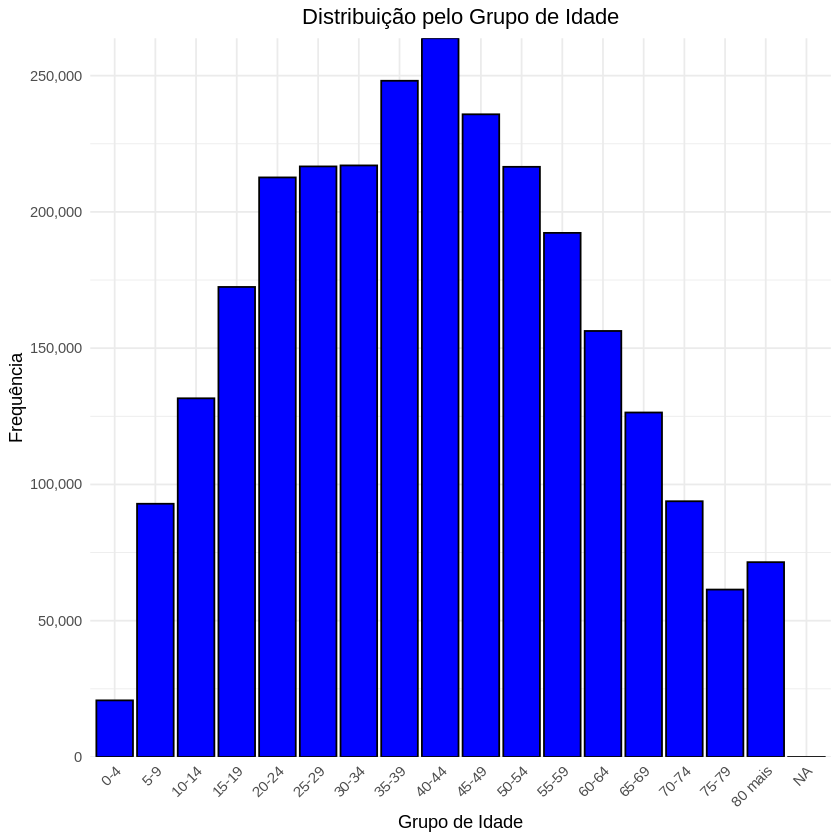

In [ ]:
# Gráfico de barras da distribuição pelo grupo de idade
ggplot(df_analisedescritiva, aes(x = grupo_idade)) +
  geom_bar(fill = "blue", color = "black") +
  labs(x = "Grupo de Idade", y = "Frequência", title = "Distribuição pelo Grupo de Idade") +
  theme_minimal() +
  scale_x_discrete(labels = function(x) gsub(" anos", "", x)) +
  scale_y_continuous(labels = comma, expand = c(0, 0)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5))

## Crianças, Adultos e Idoso

In [ ]:
# Definindo as faixas etárias
faixa_etaria <- cut(df_analisedescritiva$idade,
                    breaks = c(0, 18, 65, Inf),
                    labels = c("Crianças", "Adultos", "Idosos"),
                    include.lowest = TRUE)

In [ ]:
# Contagem das faixas etárias
contagem_faixa_etaria <- table(faixa_etaria)

In [ ]:
# Definindo as cores corretas
cores <- c("Crianças" = "#FFD700",
           "Adultos" = "#8B4513",
           "Idosos" = "#808080")

In [ ]:
# Definindo a ordem das categorias
ordem_categorias <- c("Crianças", "Adultos", "Idosos")

In [ ]:
# Criando o gráfico de barras
grafico_barras <- ggplot(data.frame(contagem_faixa_etaria), aes(x = reorder(names(contagem_faixa_etaria), -Freq), y = Freq, fill = names(contagem_faixa_etaria))) +
  geom_bar(stat = "identity") +
  labs(x = "Faixa Etária", y = "Frequência") +
  scale_fill_manual(values = cores, breaks = ordem_categorias, labels = ordem_categorias) +
  theme_bw()

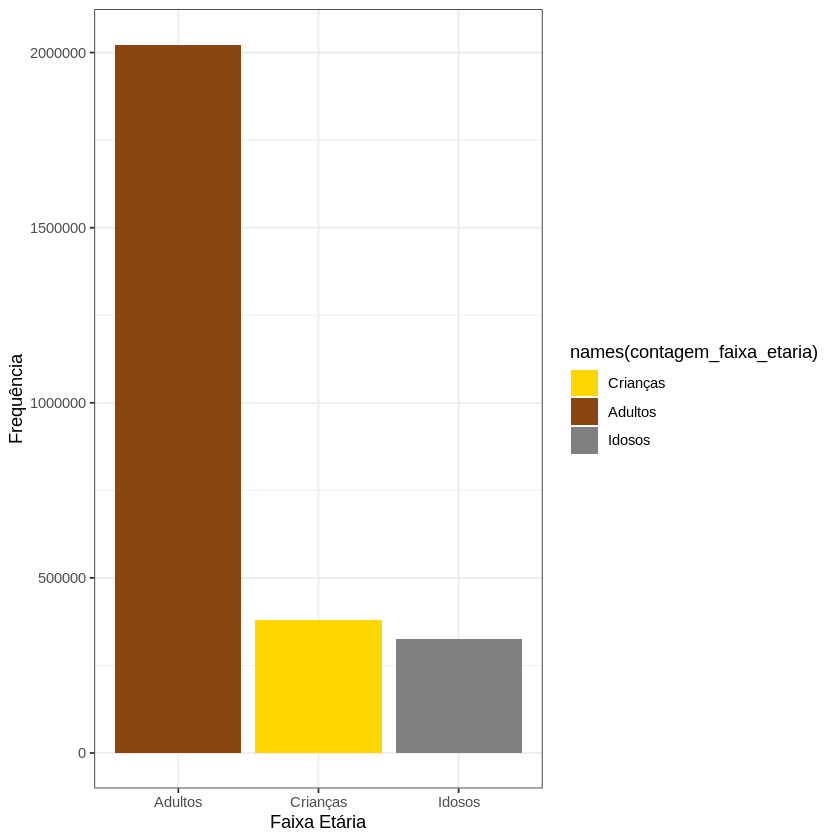

In [ ]:
# Exibindo o gráfico
print(grafico_barras)

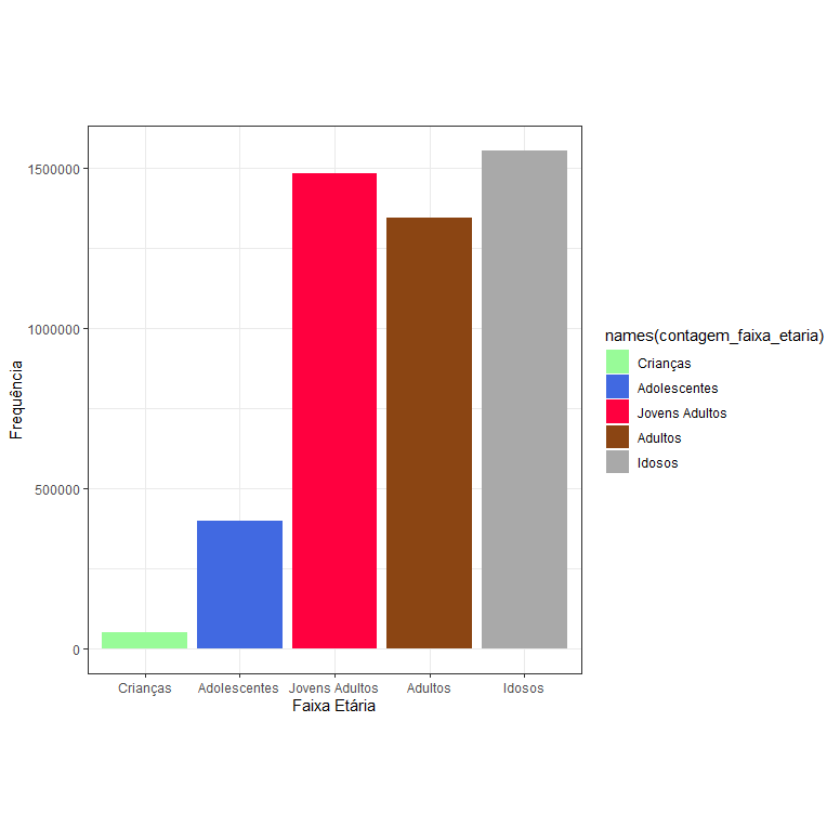

In [5]:
# Definindo as faixas etárias
faixa_etaria <- cut(df_analisedescritiva$idade,
                    breaks = c(0, 12, 18, 35, 50, Inf),
                    labels = c("Crianças", "Adolescentes", "Jovens Adultos", "Adultos", "Idosos"),
                    include.lowest = TRUE)

# Contagem das faixas etárias
contagem_faixa_etaria <- table(faixa_etaria)

# Definindo as cores corretas
cores <- c("Crianças" = "#98FB98",  # Verde mais neutro
           "Adolescentes" = "#4169E1",  # Azul mais escuro
           "Jovens Adultos" = "#00FFFF",  # Outra cor de exemplo
           "Adultos" = "#8B4513",  # Marrom
           "Idosos" = "#A9A9A9")  # Cinza

# Definindo a ordem das categorias
ordem_categorias <- c("Crianças", "Adolescentes", "Jovens Adultos", "Adultos", "Idosos")

# Criando o gráfico de barras
grafico_barras <- ggplot(data.frame(contagem_faixa_etaria), aes(x = factor(names(contagem_faixa_etaria), levels = ordem_categorias), y = Freq, fill = names(contagem_faixa_etaria))) +
  geom_bar(stat = "identity") +
  labs(x = "Faixa Etária", y = "Frequência") +
  scale_fill_manual(values = cores, breaks = ordem_categorias, labels = ordem_categorias) +
  theme_bw()

# Exibir o gráfico
print(grafico_barras)

## Por idade

In [ ]:
# Filtrar valores não finitos na variável "idade"
df_filtrado <- df_analisedescritiva[is.finite(df_analisedescritiva$idade), ]

In [ ]:
# Criar o gráfico de barras da distribuição das idades
grafico_idades <- ggplot(df_filtrado, aes(x = idade)) +
  geom_bar(fill = "blue", color = "black") +
  labs(x = "Idade", y = "Frequência", title = "Distribuição das Idades") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5)) +
  scale_x_continuous(breaks = seq(min(df_filtrado$idade), max(df_filtrado$idade), by = 5))

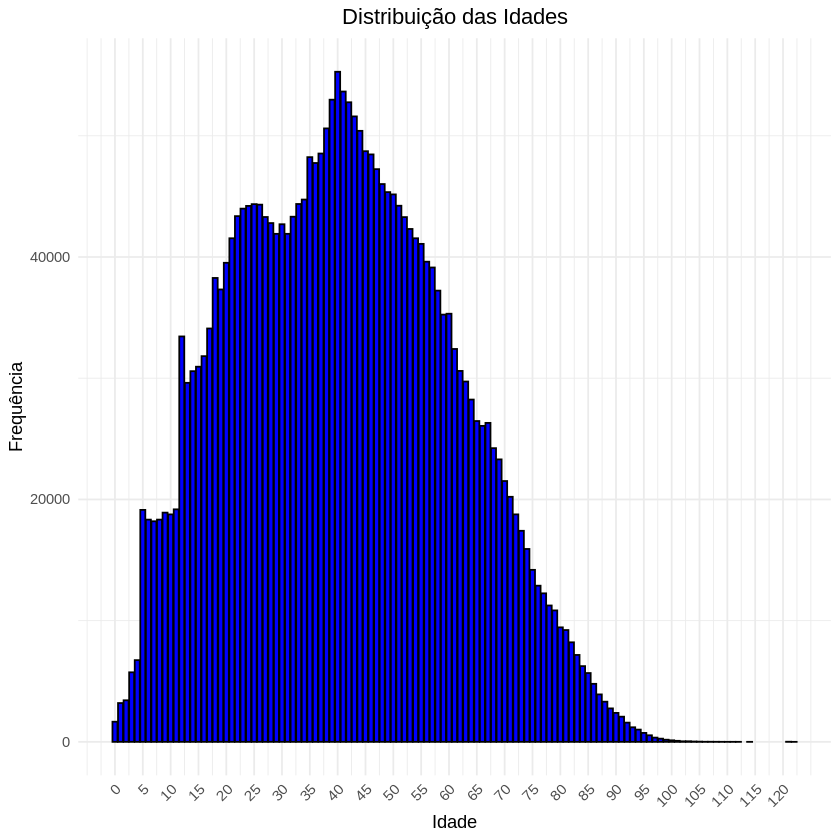

In [ ]:
# Exibir o gráfico
print(grafico_idades)

# Distribuição por Sexo

In [ ]:
# Filtrar apenas as categorias "Masculino" e "Feminino"
df_filtrado <- subset(df_analisedescritiva, enumSexoBiologico %in% c("M", "F"))

In [ ]:
# Contagem dos sexos
contagem_sexo <- table(df_filtrado$enumSexoBiologico)

In [ ]:
# Calculando as porcentagens
porcentagens <- prop.table(contagem_sexo) * 100

In [ ]:
# Criando o gráfico de pizza
grafico_pizza <- ggplot(data.frame(contagem_sexo, porcentagens), aes(x = "", y = Freq, fill = names(contagem_sexo))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(fill = "Sexo") +
  scale_fill_manual(values = c("M" = "blue", "F" = "hotpink"),
                    labels = c("M" = "Masculino", "F" = "Feminino")) +
  geom_text(aes(label = paste0(round(porcentagens, 1), "%")), position = position_stack(vjust = 0.5)) +
  theme_void()

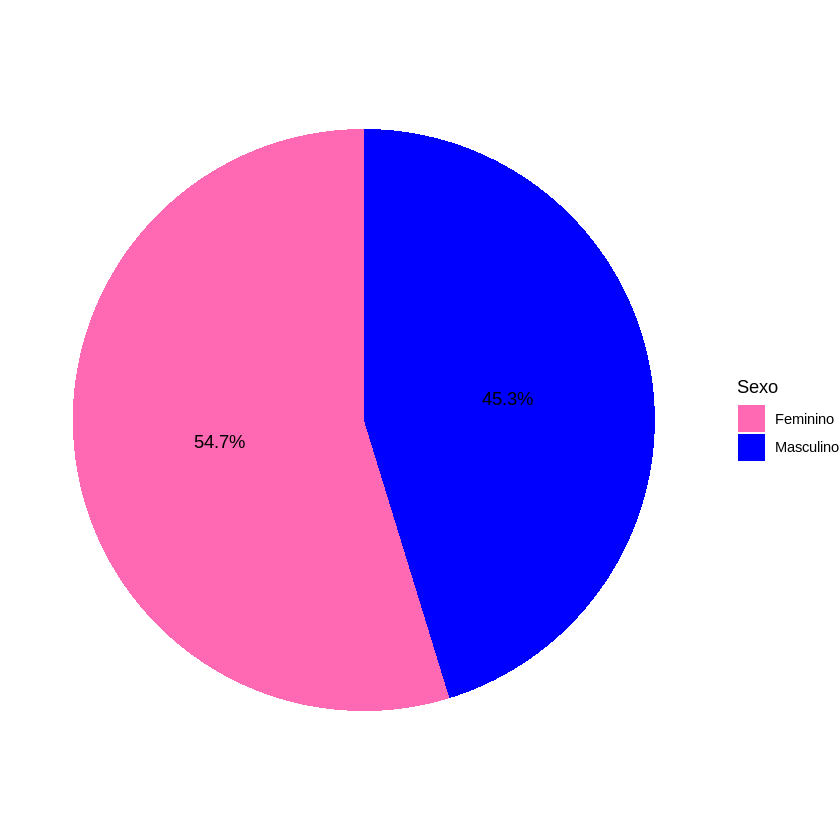

In [ ]:
# Exibindo o gráfico
print(grafico_pizza)

# Distribuição por Raça

In [ ]:
# Obter todas as raças únicas
racas_unicas <- unique(df_analisedescritiva$racaCor_valor)

racas_unicas

[1] "PARDA"          "SEM INFORMACAO" "BRANCA"         "PRETA"         
[5] "AMARELA"        "INDIGENA"       ""

In [ ]:
# Criando um novo dataframe filtrado
df_filtrado <- df_analisedescritiva

# Agrupando os valores nulos/vazios no grupo "SEM INFORMACAO"
df_filtrado$racaCor_valor[is.na(df_filtrado$racaCor_valor) | df_filtrado$racaCor_valor == ""] <- "SEM INFORMACAO"

In [ ]:
# Contagem das raças/cor
contagem_raca <- table(df_filtrado$racaCor_valor)

In [ ]:
# Criando o gráfico de barras sem cores
grafico_barras <- ggplot(data.frame(contagem_raca), aes(x = reorder(names(contagem_raca), -Freq), y = Freq)) +
  geom_bar(stat = "identity") +
  labs(x = "Raça/Cor", y = "Frequência") +
  theme_bw()

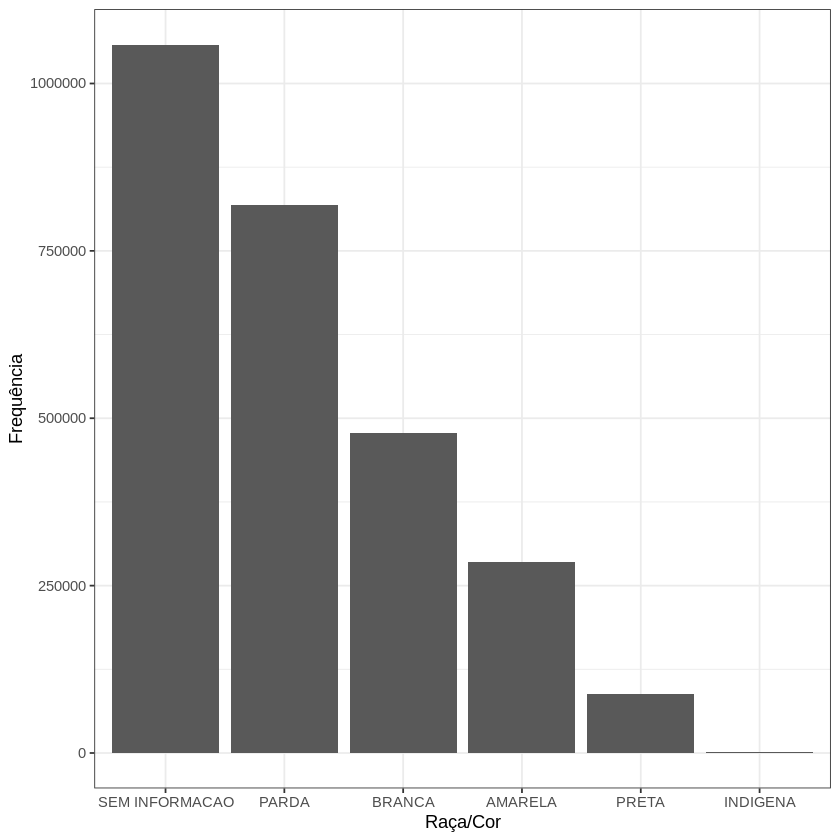

In [ ]:
# Exibindo o gráfico
print(grafico_barras)

## Colorindo

In [ ]:
# Definindo as cores corretas
cores <- c("SEM INFORMACAO" = "#808080",
           "PARDA" = "#8B4513",
           "BRANCA" = "#FFC0CB",
           "PRETA" = "#000000",
           "AMARELA" = "#FFFF00",
           "INDIGENA" = "#FF0000")


In [ ]:
# Definindo a ordem das categorias
ordem_categorias <- c("SEM INFORMACAO", "PARDA", "BRANCA", "PRETA", "AMARELA", "INDIGENA")

In [ ]:
# Criando o gráfico de barras
grafico_barras_colorido <- ggplot(data.frame(contagem_raca), aes(x = reorder(names(contagem_raca), -Freq), y = Freq, fill = names(contagem_raca))) +
  geom_bar(stat = "identity") +
  labs(x = "Raça/Cor", y = "Frequência") +
  scale_fill_manual(values = cores, breaks = ordem_categorias, labels = ordem_categorias) +
  theme_bw()

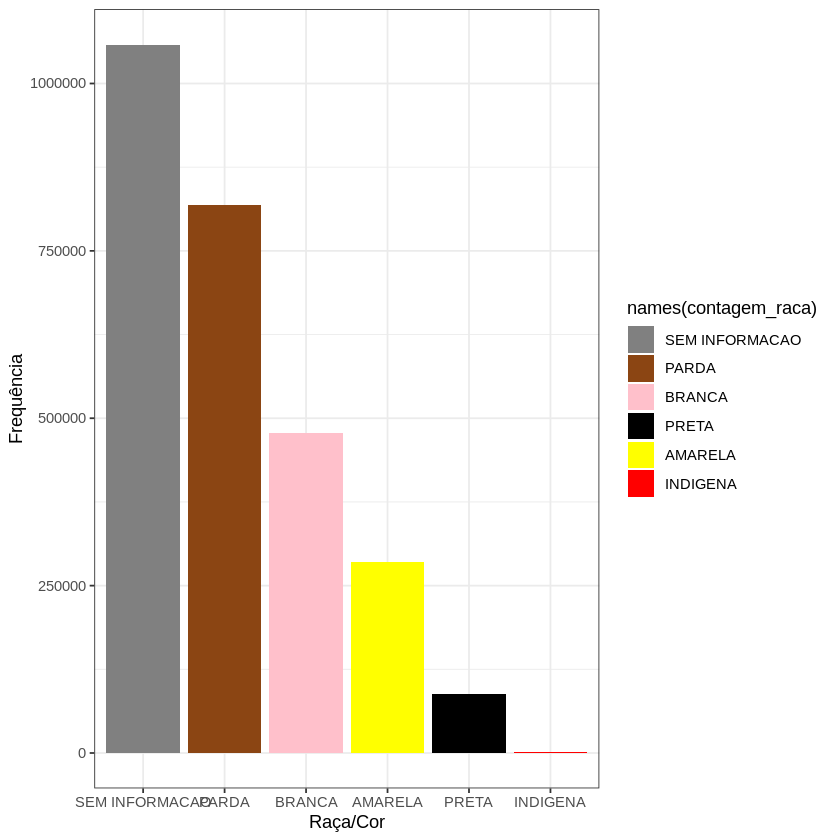

In [ ]:
# Exibindo o gráfico
print(grafico_barras_colorido)

In [ ]:
# Criando o gráfico de pizza
grafico_pizza <- ggplot(data.frame(contagem_raca), aes(x = "", y = Freq, fill = names(contagem_raca))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(fill = "Raça/Cor") +
  scale_fill_manual(values = cores, breaks = ordem_categorias, labels = ordem_categorias) +
  theme_void()

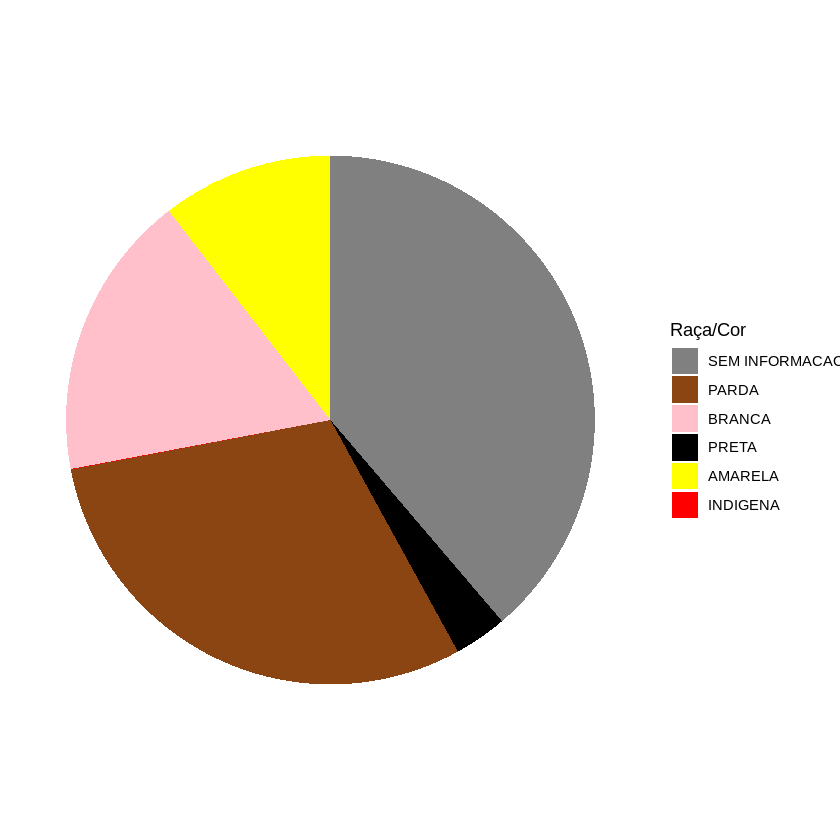

In [ ]:
# Exibindo o gráfico
print(grafico_pizza)

# Distribuição por fabricante de vacina

In [ ]:
unique(df_analisedescritiva$fabricante_nome)

[1] "JANSSEN"                                  
 [2] "ASTRAZENECA/FIOCRUZ"                      
 [3] "SINOVAC/BUTANTAN"                         
 [4] "PFIZER"                                   
 [5] "Pendente Identificação"                   
 [6] "PFIZER - PEDIÁTRICA MENOR DE 5 ANOS"      
 [7] "ASTRAZENECA"                              
 [8] "PFIZER - PEDIÁTRICA"                      
 [9] "PFIZER - PEDI?TRICA"                      
[10] "Pendente Identifica??o"                   
[11] "SINOVAC"                                  
[12] "FUNDACAO OSWALDO CRUZ"                    
[13] "PFIZER MANUFACTURING BELGIUM NV - BELGICA"
[14] "JANSSEN PHARMACEUTICA NV"                 
[15] ""

In [ ]:
# Substituir os valores no dataframe
df_filtrado <- df_analisedescritiva %>%
  mutate(fabricante_nome = case_when(
    fabricante_nome == "ASTRAZENECA/FIOCRUZ" ~ "ASTRAZENECA",
    fabricante_nome == "SINOVAC/BUTANTAN" ~ "SINOVAC",
    fabricante_nome == "JANSSEN PHARMACEUTICA NV" ~ "JANSSEN",
    fabricante_nome == "PFIZER - PEDIÁTRICA MENOR DE 5 ANOS" ~ "PFIZER",
    fabricante_nome == "PFIZER - PEDIÁTRICA" ~ "PFIZER",
    fabricante_nome == "PFIZER - PEDI?TRICA" ~ "PFIZER",
    fabricante_nome == "PFIZER MANUFACTURING BELGIUM NV - BELGICA" ~ "PFIZER",
    fabricante_nome == "Pendente Identifica??o" ~ "Sem Identificação",
    fabricante_nome == "Pendente Identificação" ~ "Sem Identificação",
    fabricante_nome == "" ~ "Sem Identificação",
    TRUE ~ fabricante_nome
  ))

In [ ]:
unique(df_filtrado$fabricante_nome)

[1] "JANSSEN"               "ASTRAZENECA"           "SINOVAC"              
[4] "PFIZER"                "Sem Identificação"     "FUNDACAO OSWALDO CRUZ"

In [ ]:
# Contagem dos fabricantes de vacina substituídos
contagem_fabricante <- as.data.frame(table(df_filtrado$fabricante_nome))
contagem_fabricante$Freq <- as.numeric(contagem_fabricante$Freq)

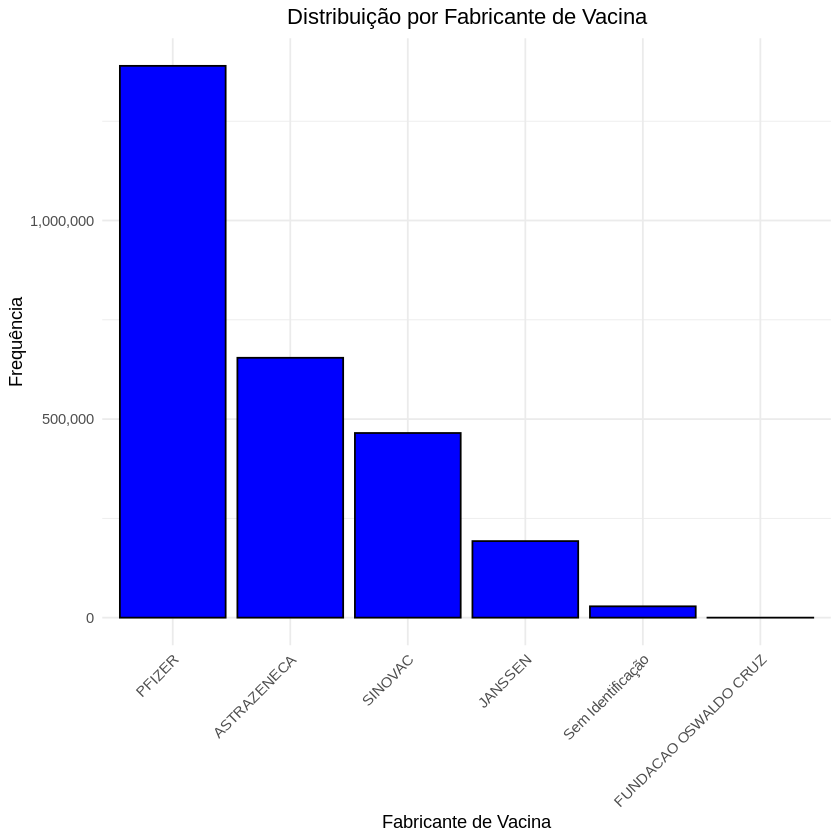

In [ ]:
# Gráfico de barras da distribuição por fabricante de vacina
ggplot(contagem_fabricante, aes(x = reorder(Var1, -Freq), y = Freq)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  labs(x = "Fabricante de Vacina", y = "Frequência", title = "Distribuição por Fabricante de Vacina") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5))

# Vacinação por Mês

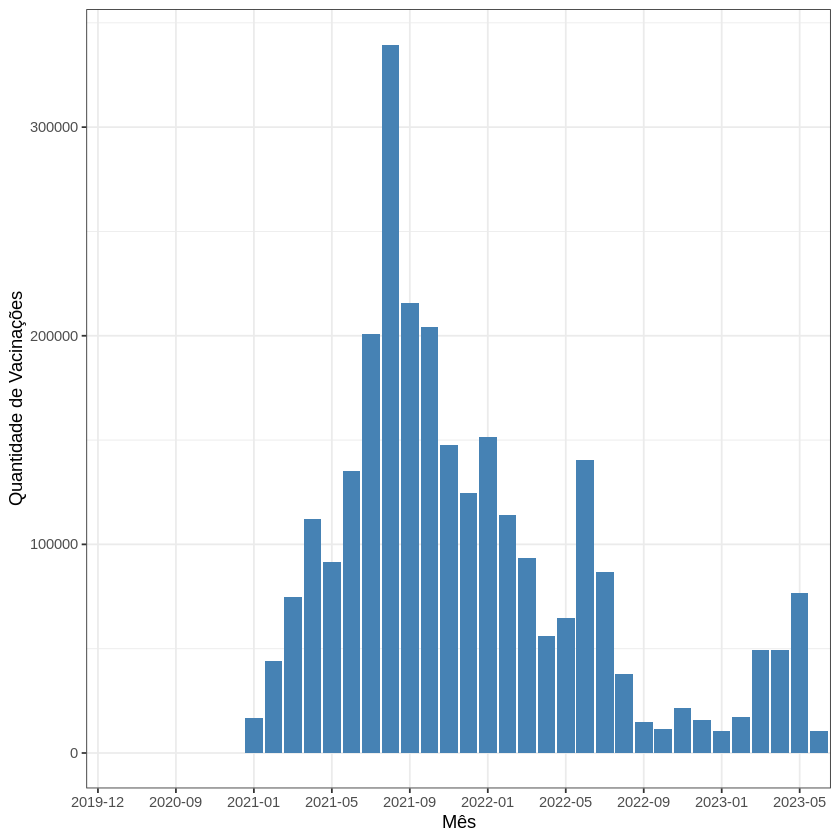

In [ ]:
# Converter a coluna dataAplicacao para o formato Date, se necessário
df_analisedescritiva$dataAplicacao <- as.Date(df_analisedescritiva$dataAplicacao)

# Extrair o mês da coluna dataAplicacao
df_analisedescritiva$mes <- format(df_analisedescritiva$dataAplicacao, "%Y-%m")

# Contar a quantidade de vacinações por mês
contagem_mes <- table(df_analisedescritiva$mes)

# Converter os dados em um dataframe
dados_grafico <- data.frame(Mês = names(contagem_mes), Vacinações = as.numeric(contagem_mes))

# Criar o gráfico de barras
grafico_vacinacoes <- ggplot(dados_grafico, aes(x = Mês, y = Vacinações)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Mês", y = "Quantidade de Vacinações") +
  theme_bw() +
  scale_x_discrete(breaks = unique(dados_grafico$Mês)[c(TRUE, FALSE, FALSE, FALSE)]) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

# Exibir o gráfico
print(grafico_vacinacoes)

# Vacinação por Semana

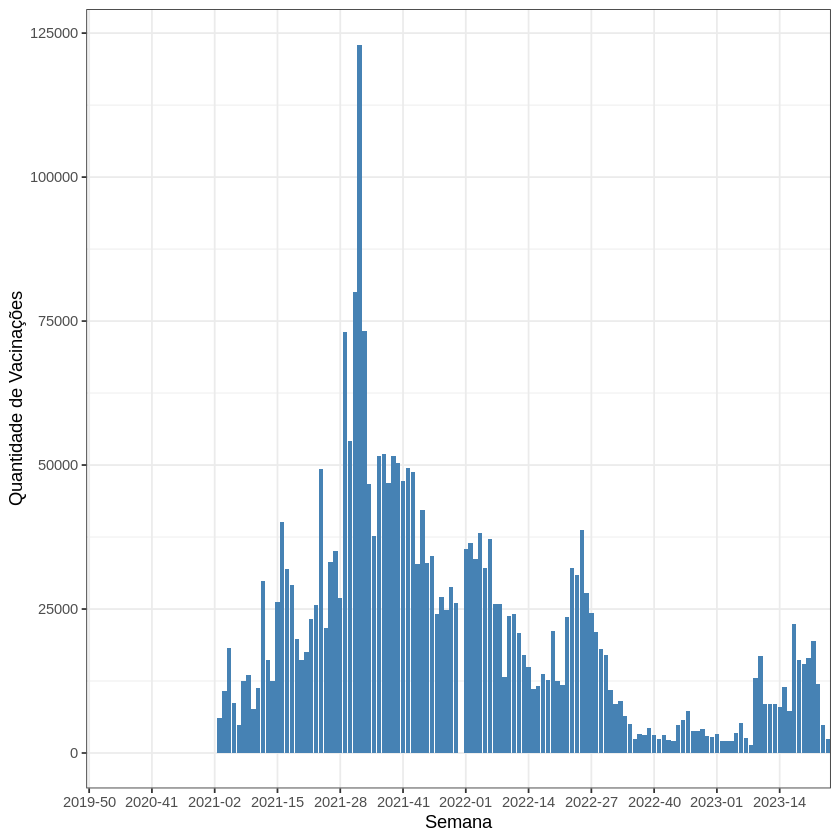

In [ ]:
# Contar a quantidade de vacinações por semana
contagem_semana <- table(format(df_analisedescritiva$dataAplicacao, "%Y-%U"))

# Converter os dados em um dataframe
dados_grafico <- data.frame(Semana = names(contagem_semana), Vacinacoes = as.numeric(contagem_semana))

# Ordenar as semanas de forma correta
dados_grafico$Semana <- factor(dados_grafico$Semana, levels = unique(dados_grafico$Semana))

# Criar o gráfico de barras
grafico_vacinacoes <- ggplot(dados_grafico, aes(x = Semana, y = Vacinacoes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Semana", y = "Quantidade de Vacinações") +
  theme_bw() +
  scale_x_discrete(breaks = unique(dados_grafico$Semana)[c(TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)]) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

# Exibir o gráfico
print(grafico_vacinacoes)
